# Analyzing a dataset and performing a classification analysis

## Import our libraries

In [1]:
#Import standard modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cycler as cycler
import seaborn as sns
from IPython.display import display
import random
%matplotlib inline

In [2]:
#Import modules specific to the machine learning aspect of this analysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Import classification algorithm modules
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture

## Read the data

In [3]:
df = pd.read_csv('bank.csv')

In [4]:
df.head(n=20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (deposit).

The objective in this exercise is to analyze the data, extract some meaningful insights about the features and their relationship to the outcome (deposit = yes or no), come up with some strategies for future campaigns, and build a predictive model that will allow us in the future to determine whether or not a customer will subscribe (deposit = yes)

Brief explanation of the "not so intuitive" features

Housing - has a house loan

Loan - has a personal loan

Month - last contact month

Day - last contact day

Duration - last contact duration (phone call)

Campaign - number of contacts performed during this campaign and for this client

Pdays - number of days since previous contact

Previous - number of contacts before this campaign and for this client

Poutcome - outcome of previous marketing campaign and for this client

Deposit - this is the dependent variable that we are going to want to build a predictive model to classify, describes whether or not a client subscribed a term deposit (deposit = yes)

In [5]:
df.describe(exclude = None)

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Lets change the dependent variable to a binary outcome (0 if no, 1 if yes)

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

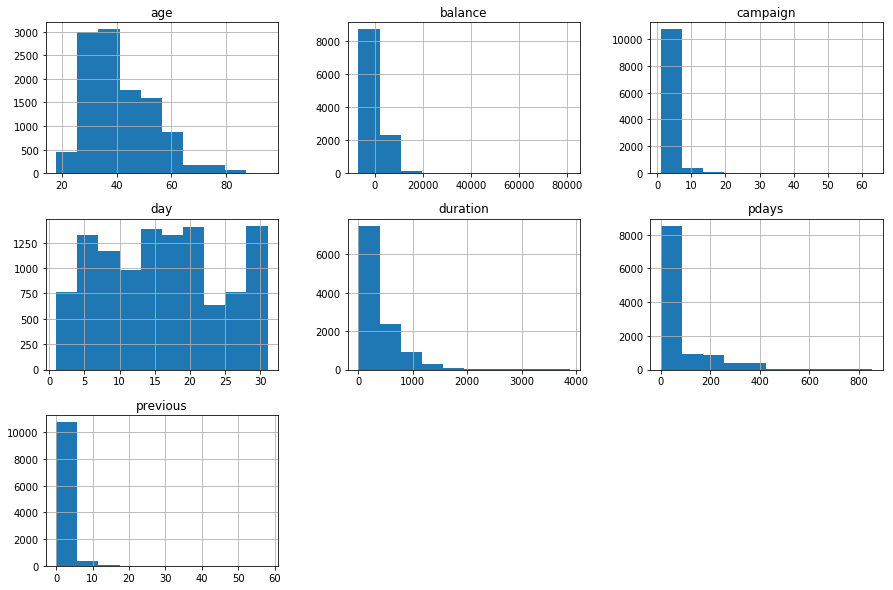

In [7]:
df.hist(figsize = (15,10))
plt.show()

In [8]:
conv_cols = ['default','housing','loan','deposit']
def convert_to_int(df, cols):
    for col in cols:
        df[col] = df[col].map({'yes' : 1, 'no' : 0})

In [9]:
convert_to_int(df,conv_cols)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [10]:
#delete some features
df.drop(['contact','pdays'], axis = 1, inplace = True)
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,5,may,1042,1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,5,may,1467,1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,5,may,1389,1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,5,may,579,1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,5,may,673,2,0,unknown,1


In [11]:
df['deposit'].mean()

0.4738398136534671

By looking at the mean of our dependent variable, we can see that the dataset isnt too imbalanced.

## Exploratory analysis
Here we will try to derive meaning from the relationships we find, and then, business insights

In [12]:
viz_num_cols = ['age']
def viz_rel_num(df, cols):
    for col in cols:
        df_num = pd.DataFrame()
        df_num['success'] = df[col][df['deposit'] == 1].value_counts().sort_index()
        df_num['fail'] = df[col][df['deposit'] == 0].value_counts().sort_index()
        df_num['ratio'] = df_num['success'] / df_num['fail']
        df_num['dist'] = df[col].value_counts()
        axes = df_num.shape[1]
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, axes, figsize = (17,5))
        for i in range(0,axes):
            fig.suptitle(col, fontsize = 24)
            fig.axes[i].set_title(df_num.columns[i])
            fig.axes[i].plot(df_num.iloc[:,i])
        plt.show()

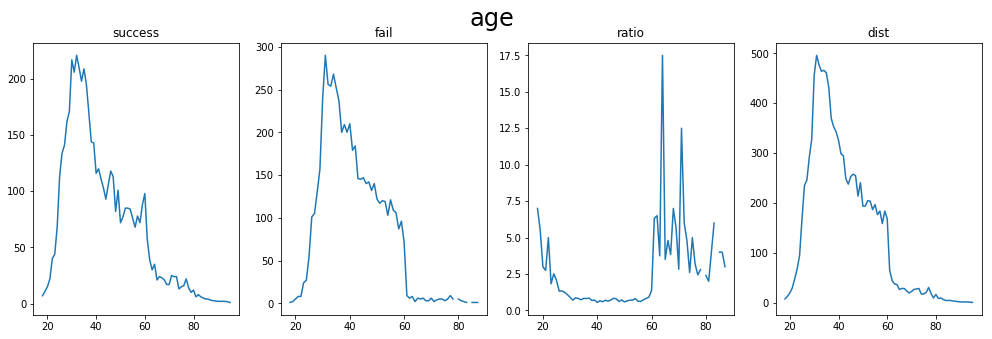

In [13]:
viz_rel_num(df, viz_num_cols)

## Insight #1
Although individuals between the ages of 22-60 account for most of the successful deposits, they also account for most of the failures. Furthermore, we can see that that age group has been historically prioritized considering they make up most of the dataset (seen in the dist graph).

We can see from the "ratio" graph, that individuals between the ages of 60-80 have a better ratio of successful deposits to failed deposits. In other words, they seem to be more likely to subscribe, than not, resulting in a succesful campaign.

I would recommend to the marketing team to prioritize marketing to individuals in the 60-87 age group, as they are more likely to result in a successful subscription.

Lets keep digging.

In [14]:
viz_cat_cols = ['job','marital','education']
def viz_rel_cat(df, cols):
    for col in cols:
        df_cat = pd.DataFrame()
        df_cat['success'] = df[col][df['deposit'] == 1].value_counts()
        df_cat['fail'] = df[col][df['deposit'] == 0].value_counts()
        df_cat['ratio'] = df_cat['success'] / df_cat['fail']
        df_cat['dist'] = df[col].value_counts()
        x = df_cat.index
        axes = df_cat.shape[1]
        palette = sns.color_palette('hls', df_cat.index.shape[0])
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, axes, figsize = (17,5))
        for i in range(0,axes):
            fig.suptitle(col, fontsize = 24)
            fig.axes[i].set_title(df_cat.columns[i])
            sns.barplot(x = x, y = df_cat.iloc[:,i].values, ax = fig.axes[i], palette = palette).set_xticklabels(rotation = 90, labels = x)
        plt.show()

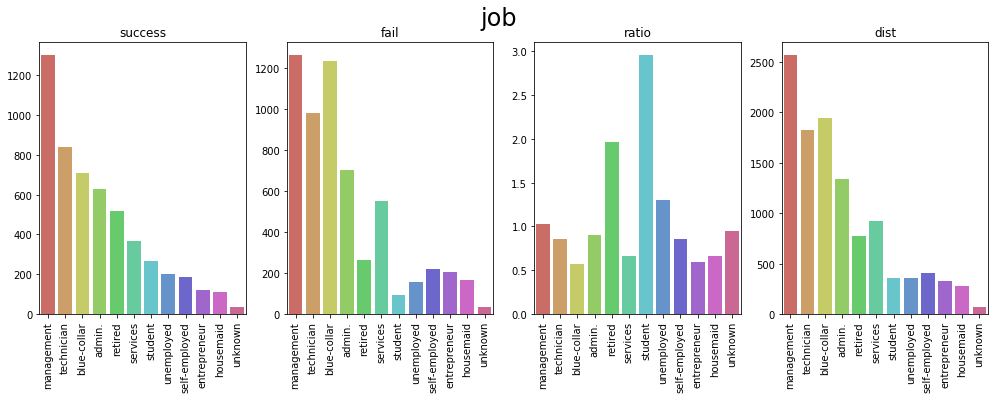

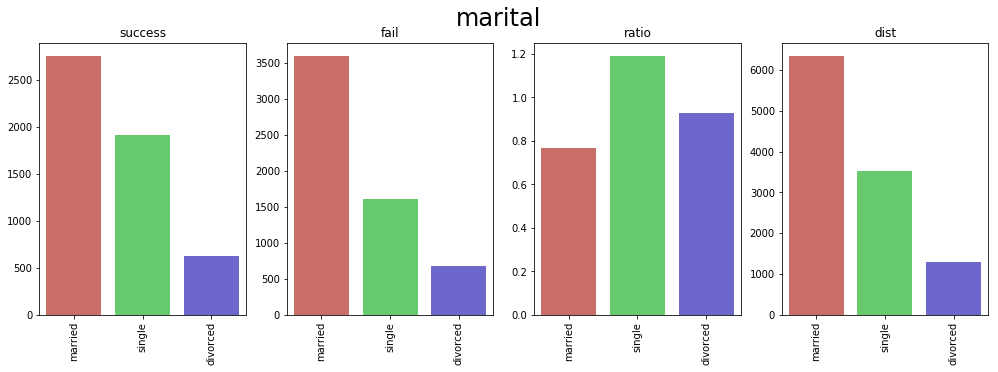

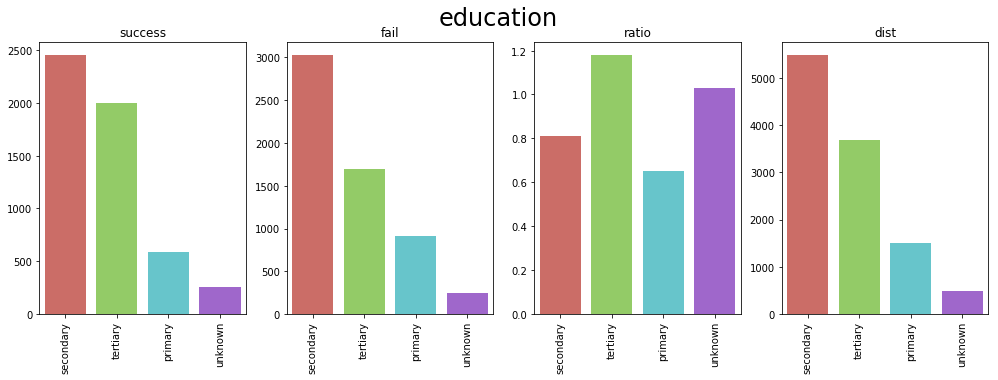

In [15]:
viz_rel_cat(df, viz_cat_cols)

In [16]:
# palette = sns.choose_colorbrewer_palette('qualitative') < this is a neat function that lets you choose a colorbrewer scheme in seaborn, however it has a limit on the amount of original colors it will use

In [17]:
col_names = ['age', 'job','marital','education']
def top_5(df, cols):
    for col in cols:
        df_5 = pd.DataFrame()
        df_5['success'] = df[col][df['deposit'] == 1].value_counts()
        df_5['fail'] = df[col][df['deposit'] == 0].value_counts()
        df_5['ratio'] = df_5['success'] / df_5['fail']
        df_5['dist'] = df[col].value_counts()
        df_5.sort_values(by = 'ratio', ascending = False, inplace = True)
        display(df_5.head())

In [18]:
top_5(df,col_names)

,success,fail,ratio,dist
64,35,2.0,17.5,37
71,25,2.0,12.5,27
18,7,1.0,7.0,8
68,21,3.0,7.0,24
62,39,6.0,6.5,45


,success,fail,ratio,dist
student,269,91,2.956044,360
retired,516,262,1.969466,778
unemployed,202,155,1.303226,357
management,1301,1265,1.028458,2566
unknown,34,36,0.944444,70


,success,fail,ratio,dist
single,1912,1606,1.190535,3518
divorced,622,671,0.926975,1293
married,2755,3596,0.766129,6351


,success,fail,ratio,dist
tertiary,1996,1693,1.178972,3689
unknown,252,245,1.028571,497
secondary,2450,3026,0.809650,5476
primary,591,909,0.650165,1500


## Insight #2
As we can see students, retirees, and the unemployed make up the top 3 groups within our jobs feature that have the best success/fail ratios.

The retirees and unemployed being in the top 3 correlate with our findings before on age, and how seniors seem to have the best success/fail ratios.

The students showing the best ratio, however, does not correlate with our findings; we can still gather from this finding that the students make up a majority of the successful deposit subscriptions within their respective age groups.

We can see, in the above cell, that students, retirees, and the unemployed are currently not as prioritized as other groups such as management and blue-collar workers.

Furthermore, we can see that individuals who classify themselves as single, and those who went to a tertiary school have the best success/fail ratios in their respective categories. This makes sense, as individuals who are single might be able to make a commitment such as an investment in a quicker manner because they do not have to run the decision by a significant other; individuals who went to a tertiary school might have more funds (and possibly more knowledge about the investment product) and therefore possibly have more funds to invest.

These are the groups that the marketing team should focus on in future campaigns.